In [3]:
from collections import defaultdict
import os
from shutil import copyfile


def copy_data(directory, files):
    if not os.path.exists(directory):
        os.makedirs(directory)
    for file in files:
        dst = directory + file.split("/")[-1]
        copyfile(file, dst)
    print(file, dst)

In [4]:

fake = defaultdict(list)
real = []
paths = defaultdict(dict)
    
source_dir = '/home/ubuntu/fake_and_real_images/real_and_fake_face_detection/real_and_fake_face'
for dirname, _, filenames in os.walk(source_dir):
    for filename in filenames:
        if "real" in filename:
            num = int(filename.split("_")[1].split(".")[0])
            real.append(num)
            paths["real"][num] = os.path.join(dirname, filename)
        else:
            difficulty = filename.split("_")[0]
            num = int(filename.split("_")[1] + filename.split("_")[2].split(".")[0])
            fake[difficulty].append(num)
            paths[difficulty][num] = os.path.join(dirname, filename)

train_fake = []
test_fake = []
train_real = []
test_real = []
for i in fake.keys():
    files = sorted(fake[i])
    split = int(len(files)*0.2)
    test_fake.extend([paths[i][j] for j in files[:split]])
    train_fake.extend([paths[i][j] for j in files[split:]])

files = sorted(real)
split = int(len(files)*0.2)
test_real.extend([paths["real"][j] for j in files[:split]])
train_real.extend([paths["real"][j] for j in files[split:]])

copy_data("test/real/",test_real)
copy_data("test/fake/",test_fake)
copy_data("train/real/",train_real)
copy_data("train/fake/",train_fake)

/home/ubuntu/fake_and_real_images/real_and_fake_face_detection/real_and_fake_face/training_real/real_00216.jpg test/real/real_00216.jpg
/home/ubuntu/fake_and_real_images/real_and_fake_face_detection/real_and_fake_face/training_fake/hard_48_0011.jpg test/fake/hard_48_0011.jpg
/home/ubuntu/fake_and_real_images/real_and_fake_face_detection/real_and_fake_face/training_real/real_01081.jpg train/real/real_01081.jpg
/home/ubuntu/fake_and_real_images/real_and_fake_face_detection/real_and_fake_face/training_fake/hard_240_1101.jpg train/fake/hard_240_1101.jpg


In [1]:

from fastai.vision import *

In [2]:
path = "train/"

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [3]:
data.classes

['fake', 'real']

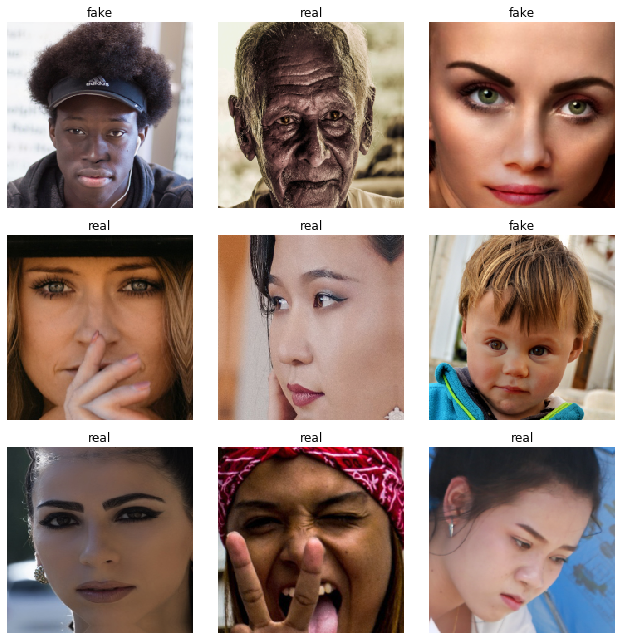

In [4]:
data.show_batch(rows=3, figsize=(9,9))

In [5]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['fake', 'real'], 2, 1307, 326)

In [6]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [7]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.453290,1.647192,0.509202,02:28
1,1.252736,1.034268,0.549080,02:29
2,0.998625,0.814660,0.607362,02:27
3,0.841924,0.774636,0.619632,02:28


In [44]:
learn.save('stage-1')
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


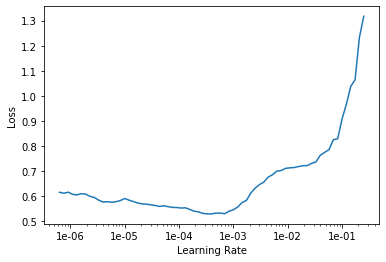

In [45]:
learn.recorder.plot()

In [46]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-1))

epoch,train_loss,valid_loss,accuracy,time
0,2.243430,31645.269531,0.564417,03:28
1,1.937304,7.304422,0.524540,03:31


In [47]:
learn.save('stage-2')

In [16]:
learn.load('stage-2');

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

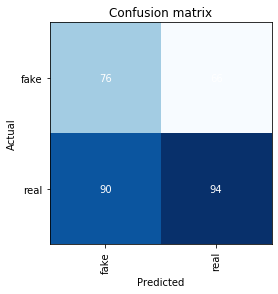

In [18]:
interp.plot_confusion_matrix()

In [8]:
interp = ClassificationInterpretation.from_learner(learn)


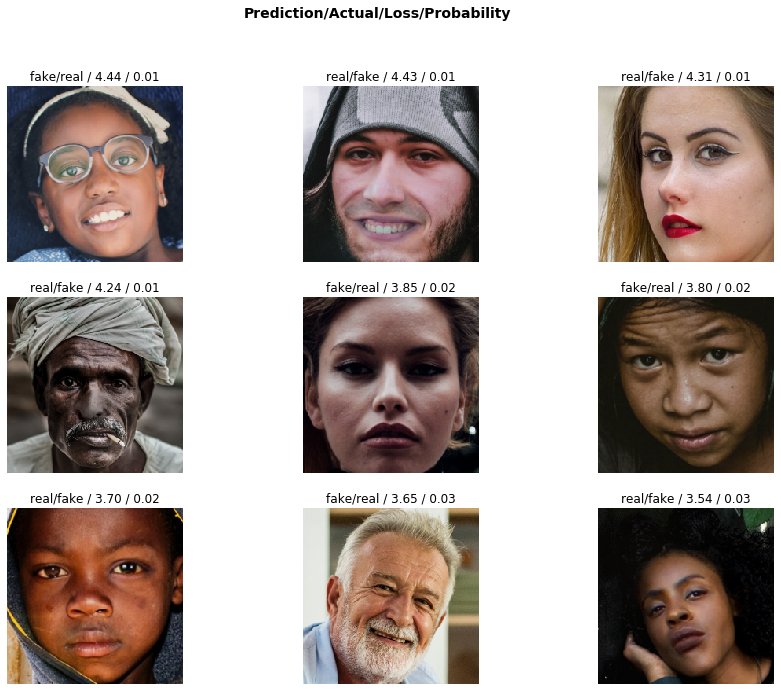

In [9]:
interp.plot_top_losses(9, figsize=(15,11))
